In [1]:
import ast
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd

c:\Users\FAIZAN AKHTAR\anaconda3\envs\pthon_data_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
my_dataset=load_dataset('lukebarousse/data_jobs')

In [3]:
df=my_dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])

In [5]:
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df=df.explode('job_skills')

In [33]:
df['job_skills'].value_counts()

job_skills
sql             384849
python          380909
aws             145381
azure           132527
r               130892
                 ...  
rubyon rails         1
visualbasic          1
msaccess             1
dingtalk             1
rocketchat           1
Name: count, Length: 252, dtype: int64

In [35]:
df[['job_skills', 'salary_year_avg']]

,job_skills,salary_year_avg
0,None,NaN
1,r,NaN
1,python,NaN
1,sql,NaN
1,nosql,NaN
...,...,...
785739,kafka,NaN
785739,kubernetes,NaN
785739,docker,NaN
785740,aws,NaN


In [36]:
df=df.dropna(subset='salary_year_avg')

In [37]:
df['job_skills'].value_counts()

job_skills
sql        12951
python     12869
r           5088
aws         4949
tableau     4814
           ...  
kali           1
fastify        1
debian         1
pascal         1
lua            1
Name: count, Length: 219, dtype: int64

In [38]:
df_DA_US=df[(df['job_title_short']=='Data Analyst') & (df['job_location']=='United States')].copy()

In [40]:
df_DA_US[['job_skills', 'salary_year_avg']]

,job_skills,salary_year_avg
18059,sql,54000.0
18059,excel,54000.0
18059,ms access,54000.0
19941,python,100500.0
19941,sql,100500.0
...,...,...
754319,excel,89204.0
771454,python,100500.0
771454,r,100500.0
771915,word,69900.0


In [42]:
df_DA_US_group=df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [45]:
df_DA_US_topsal=df_DA_US_group.sort_values(by='median', ascending=False).head(10)

In [46]:
df_DA_US_topsal

,count,median
job_skills,,
pytorch,1,220000.0
jira,1,190000.0
atlassian,1,190000.0
unity,1,169833.5
git,1,147500.0
snowflake,2,132225.0
spss,1,119550.0
c#,1,119550.0
perl,1,119550.0


In [60]:
df_DA_US_topskill=df_DA_US_group.sort_values(by='count', ascending=False).head(10)

In [62]:
df_DA_US_topskill=df_DA_US_topskill.sort_values(by='median', ascending=False)

In [63]:
df_DA_US_topskill

,count,median
job_skills,,
power bi,10,106400.00
python,15,100000.00
sas,4,93525.00
sql,20,88500.00
tableau,16,88500.00
r,8,88500.00
excel,14,82258.75
sharepoint,5,77017.50
powerpoint,3,75067.50


<Axes: ylabel='job_skills'>

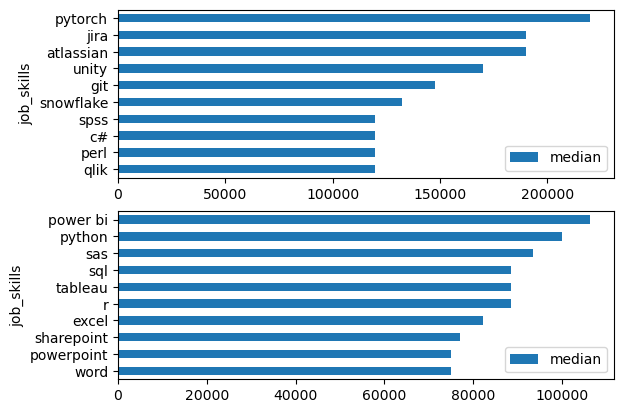

In [64]:
fig, ax=plt.subplots(2,1)
df_DA_US_topsal[::-1].plot(kind='barh', y='median', ax=ax[0])
df_DA_US_topskill[::-1].plot(kind='barh', y='median', ax=ax[1])
